Karen Chapski
GA DS 60 SF
Project 2

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [179]:
#import Pandas, Matplot lib , Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [180]:
#read in movies data
movies = pd.read_csv('./datasets/imdb_1000.csv')
#print out first 5 rows of movies
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [181]:
# Answer:
#979 rows, 6 columns, added a column in notebook, new total is 7
movies.shape


(979, 6)

#### Check the data type of each column.

In [182]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [183]:
# Answer:

movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [184]:
# Answer:


#sort movies data by duration descending
movies_sorted =movies.sort_values("duration", ascending = False)

#longest value is the first value, shortest value is the last
longest = movies_sorted[['title','duration']].head(1)
shortest = movies_sorted[['title','duration']].tail(1)

print(longest)
print(shortest)





      title  duration
476  Hamlet       242
      title  duration
389  Freaks        64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

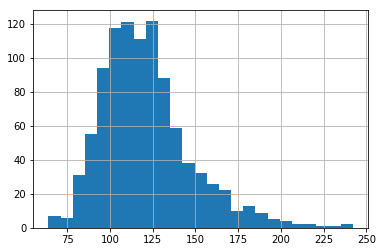

In [185]:
# Answer:
#duration is slightly skewed to the left, but fairly normally distributed

movies['duration'].hist(bins = 25);

#### Use a box plot to display that same data.

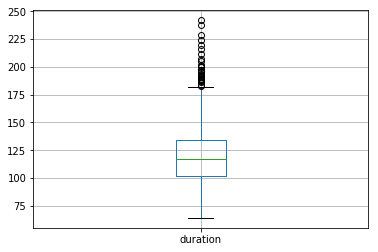

In [186]:
# Answer:
# a fair number of high valued outliers

movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [187]:
# Answer:

movies.groupby(['content_rating']).size().sort_values(ascending = False)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Count Titles in Rating')

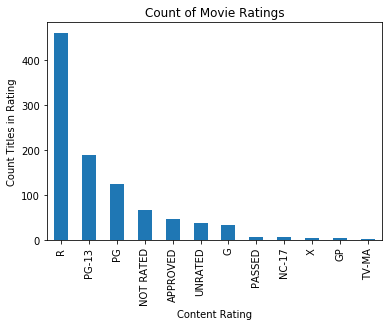

In [188]:
# Answer:


movies.groupby(['content_rating']).size().sort_values(ascending = False).plot(kind='bar', title = 'Count of Movie Ratings')
plt.xlabel("Content Rating")
plt.ylabel("Count Titles in Rating")




#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [189]:
movies.groupby(['content_rating']).size()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

In [190]:
# Answer:
#creating a copy to keep original DF intact
#previous counts of ratings :
#NOT RATED = 65
#APPROVED = 47
#PASSED= 7
#GP = 3
#UNRATED = 38

#total new UNRATED count = 160 (next cell output)
test_movies = movies.copy()
test_movies.groupby(['content_rating']).size()


content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

In [191]:
#using copied DF to replace values, movies stays unchanged

test_movies = test_movies.replace(to_replace = ['NOT RATED', 'APPROVED', 'PASSED', 'GP'], value = ['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED'])

test_movies.groupby(['content_rating']).size()


content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [192]:
# Answer:

test_movies = test_movies.replace(to_replace = ['X', 'TV-MA'], value = ['NC-17', 'NC-17'])

test_movies.groupby(['content_rating']).size()


content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
dtype: int64

#### Count the number of missing values in each column.

In [193]:
# Answer:

movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [194]:
# Answer:

#find records with null values
movies[movies.content_rating.isnull()]

#replace NULL with UNRATED
movies.content_rating.fillna('UNRATED', inplace = True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [195]:
# Answer:

#find mean for two buckets
two_hours=movies[movies['duration'] >= 120].star_rating.mean() 
lessthan_two_hours =movies[movies['duration'] < 120].star_rating.mean()

#print values
print(two_hours)
print(lessthan_two_hours)
#print difference between the two averages
print(two_hours - lessthan_two_hours)

7.948898678414082
7.838666666666657
0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

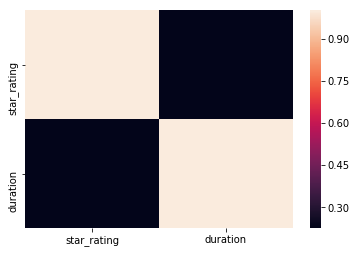

In [196]:
# Answer:

# there is slight correlation between the two variables
sb.heatmap(movies.corr());


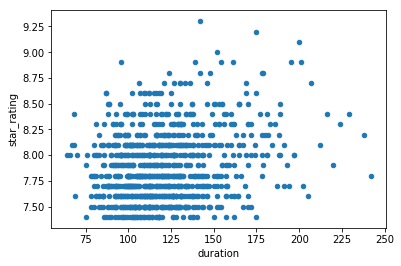

In [197]:

movies.plot(kind = 'scatter', x= 'duration', y= 'star_rating');

#### Calculate the average duration for each genre.

In [198]:
# Answer:

movies.groupby(['genre']).mean().sort_values(by = 'duration',ascending = False)



,star_rating,duration
genre,,
Western,8.255556,136.666667
Adventure,7.933333,134.840000
Biography,7.862338,131.844156
Drama,7.902518,126.539568
Action,7.884559,126.485294
Crime,7.916935,122.298387
Mystery,7.975000,115.625000
Thriller,7.680000,114.200000
Fantasy,7.700000,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

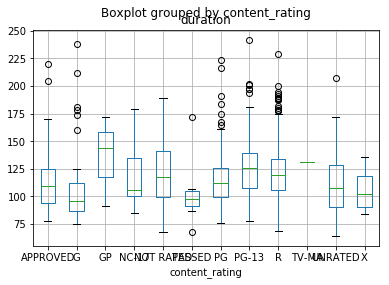

In [199]:
# Answer:

movies.boxplot(column= 'duration', by = 'content_rating');




#### Determine the top rated movie (by star rating) for each genre.

In [200]:
# Answer:

print(movies.sort_values('star_rating').groupby(['genre']).title.first())


genre
Action                                     X-Men
Adventure                        The Bucket List
Animation                    Alice in Wonderland
Biography                        Man on the Moon
Comedy                                Home Alone
Crime                                Wall Street
Drama                                 Eraserhead
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                             Spellbound
History                      Battleship Potemkin
Horror                               Poltergeist
Mystery                                Limitless
Sci-Fi                      The Butterfly Effect
Thriller               The Man Who Knew Too Much
Western                      High Plains Drifter
Name: title, dtype: object


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [201]:
# Answer:

#find duplicate titles

duplicate =movies[movies.title.duplicated()].title
print(duplicate)


482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object


In [202]:
#look for duplicate titles in movies

movies[movies.title.isin(duplicate)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [203]:
# Answer:

#find count of titles by genre
movie_count=movies.groupby(['genre']).title.count()
print(movie_count)


#create a list of the greatest genres
largest_genres = ['Action', 'Adventure', 'Animation', 'Biography',
                 'Comedy', 'Drama', 'Horror', 'Mystery']

#use the titles to filter and find the average rating
movies[movies.genre.isin(largest_genres)].groupby('genre').star_rating.mean()


genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Family         2
Fantasy        1
Film-Noir      3
History        1
Horror        29
Mystery       16
Sci-Fi         5
Thriller       5
Western        9
Name: title, dtype: int64


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [204]:
# Answer:

#count titles by genre
count_by_genre = movies.genre.value_counts()

#filter to titles that contain 10 or more titles
total_genres = count_by_genre[count_by_genre>=10].index

#calculate the mean value
movies[movies.genre.isin(total_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [205]:
# Answer:

#group by genre, calculate the mean rating, filter by count of titles greater than or equal to 10
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [206]:
# Answer:

#find the count of titles and average rating for each genre
ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])

#filter genres for count of titles greater than or equal to 10
ratings [ratings['count']>=10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

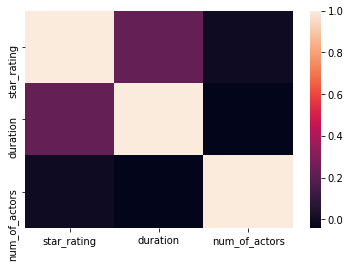

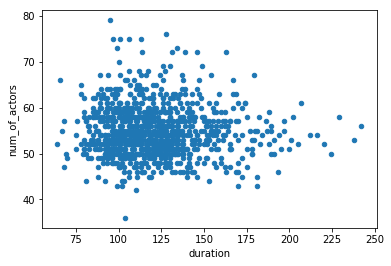

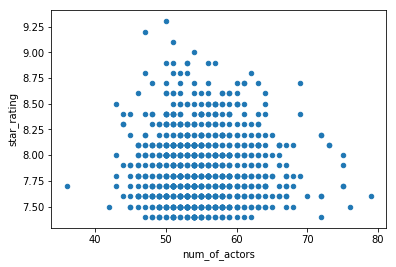

In [207]:
#movies['actors_list'].str.len()
#movies.head()

# count number of actors by movie
movies['num_of_actors'] = movies['actors_list'].str.len()

#group by genre
movies.groupby('genre').mean()

#looking to see if there's a correlation between number of actors and overall star rating
#does not seem to correlate, number of actors does not seem to impact the rating of a film
sns.heatmap(movies.corr());

movies.plot(kind = 'scatter', x= 'duration', y= 'num_of_actors');
movies.plot(kind = 'scatter', x= 'num_of_actors', y= 'star_rating');

#movies.head()